(c) Similarly, we use following codes to construct LSTM model and compare the estimated and true reported cases.

In [3]:
data=pd.DataFrame(data=data)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_scaled = sc.fit_transform(data)

In [4]:
#(b) previous 60 week's info

X_train = []
y_train = []
for i in range(60, 117):
    X_train.append(data_scaled[i-60:i,0])
    y_train.append(data_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train

array([[0.5       , 0.13194444, 0.17361111, ..., 0.29166667, 0.16666667,
        0.3125    ],
       [0.13194444, 0.17361111, 0.10416667, ..., 0.16666667, 0.3125    ,
        0.05555556],
       [0.17361111, 0.10416667, 0.5625    , ..., 0.3125    , 0.05555556,
        0.3125    ],
       ...,
       [0.04166667, 0.21527778, 0.09027778, ..., 0.05555556, 0.05555556,
        0.11805556],
       [0.21527778, 0.09027778, 0.29166667, ..., 0.05555556, 0.11805556,
        0.15972222],
       [0.09027778, 0.29166667, 0.16666667, ..., 0.11805556, 0.15972222,
        0.27083333]])

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.5       ],
        [0.13194444],
        [0.17361111],
        ...,
        [0.29166667],
        [0.16666667],
        [0.3125    ]],

       [[0.13194444],
        [0.17361111],
        [0.10416667],
        ...,
        [0.16666667],
        [0.3125    ],
        [0.05555556]],

       [[0.17361111],
        [0.10416667],
        [0.5625    ],
        ...,
        [0.3125    ],
        [0.05555556],
        [0.3125    ]],

       ...,

       [[0.04166667],
        [0.21527778],
        [0.09027778],
        ...,
        [0.05555556],
        [0.05555556],
        [0.11805556]],

       [[0.21527778],
        [0.09027778],
        [0.29166667],
        ...,
        [0.05555556],
        [0.11805556],
        [0.15972222]],

       [[0.09027778],
        [0.29166667],
        [0.16666667],
        ...,
        [0.11805556],
        [0.15972222],
        [0.27083333]]])

In [7]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

In [8]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.23))

In [9]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 55, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 55))
regressor.add(Dropout(0.2))

In [13]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 170, batch_size = 10)



Epoch 1/170
6/6 [==============================] - 4s 59ms/step - loss: 0.0576
Epoch 2/170
6/6 [==============================] - 0s 51ms/step - loss: 0.0436
Epoch 3/170
6/6 [==============================] - 0s 50ms/step - loss: 0.0525
Epoch 4/170
6/6 [==============================] - 0s 52ms/step - loss: 0.0459
Epoch 5/170
6/6 [==============================] - 0s 52ms/step - loss: 0.0536
Epoch 6/170
6/6 [==============================] - 0s 51ms/step - loss: 0.0295
Epoch 7/170
6/6 [==============================] - 0s 52ms/step - loss: 0.0398
Epoch 8/170
6/6 [==============================] - 0s 52ms/step - loss: 0.0300
Epoch 9/170
6/6 [==============================] - 0s 52ms/step - loss: 0.0473
Epoch 10/170
6/6 [==============================] - 0s 53ms/step - loss: 0.0353
Epoch 11/170
6/6 [==============================] - 0s 53ms/step - loss: 0.0442
Epoch 12/170
6/6 [==============================] - 0s 53ms/step - loss: 0.0405
Epoch 13/170
6/6 [==============================]

In [16]:
# Part 3 - Making the predictions and visualizing the results

data_test = pd.read_csv('case.csv')
real_disease = data_test.values

In [17]:

inputs = data_test.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 117):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_disease = regressor.predict(X_test)
predicted_disease = sc.inverse_transform(predicted_disease)

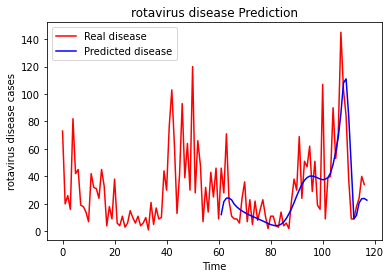

In [19]:
# Visualising the results
plt.plot(real_disease, color = 'red', label = 'Real disease')
plt.plot(range(61, 61+len(predicted_disease)), predicted_disease, color = 'blue', label = 'Predicted disease')

plt.title('rotavirus disease Prediction')
plt.xlabel('Time')
plt.ylabel('rotavirus disease cases')
plt.legend()
plt.show()